In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/customer_data.1csv.csv')
df.head(20)



,CustomerID,AnnualIncome,SpendingScore,Age,Gender
0,1,45795,80,29,Female
1,2,30860,3,43,Female
2,3,84886,20,33,Male
3,4,36265,24,68,Male
4,5,67194,54,54,Male
5,6,74131,33,39,Female
6,7,90263,24,46,Female
7,8,46023,75,31,Male
8,9,71090,72,45,Male
9,10,97221,36,22,Female


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   AnnualIncome   200 non-null    int64 
 2   SpendingScore  200 non-null    int64 
 3   Age            200 non-null    int64 
 4   Gender         200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

Index(['CustomerID', 'AnnualIncome', 'SpendingScore', 'Age', 'Gender'], dtype='object')

In [ ]:
X=df.iloc[1,[2,3]].values
X

array([3, 43], dtype=object)

In [ ]:
X=df.iloc[:,[2,3]].values
X


array([[ 80,  29],
       [  3,  43],
       [ 20,  33],
       [ 24,  68],
       [ 54,  54],
       [ 33,  39],
       [ 24,  46],
       [ 75,  31],
       [ 72,  45],
       [ 36,  22],
       [ 38,  64],
       [ 84,  66],
       [ 99,  47],
       [ 89,  63],
       [ 99,  69],
       [ 25,  22],
       [ 93,  29],
       [ 18,  33],
       [ 82,  43],
       [ 66,  43],
       [ 54,  65],
       [ 35,  38],
       [ 80,  56],
       [ 61,  53],
       [ 41,  50],
       [100,  47],
       [ 33,  54],
       [ 68,  40],
       [ 33,  27],
       [ 14,  22],
       [ 21,  53],
       [ 48,  51],
       [ 20,  69],
       [  8,  48],
       [  7,  27],
       [ 67,  36],
       [ 17,  49],
       [ 33,  18],
       [ 48,  22],
       [ 76,  62],
       [ 59,  21],
       [ 86,  33],
       [ 22,  41],
       [ 30,  33],
       [ 38,  19],
       [ 51,  66],
       [ 54,  45],
       [  8,  49],
       [ 27,  44],
       [ 27,  37],
       [ 98,  41],
       [ 21,  29],
       [ 30,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

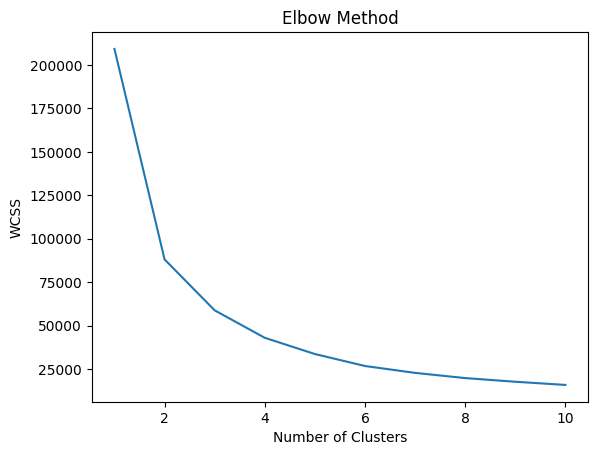

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#WCSS is within clusters sum of squares
Wcss=[]
for i in range(1,11):
  kmeans =KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  Wcss.append(kmeans.inertia_)
plt.plot(range(1,11),Wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_model=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans_model.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0,
       2, 1], dtype=int32)

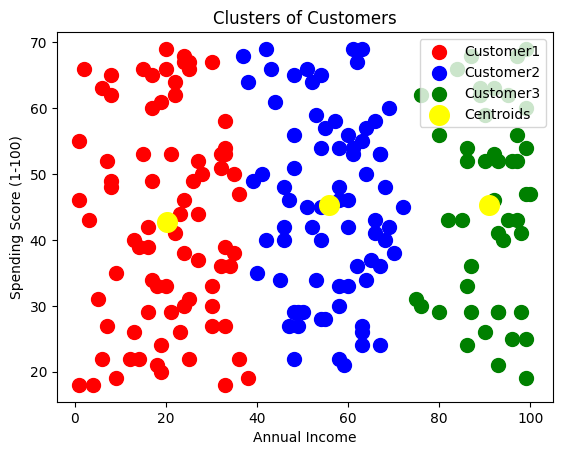

In [ ]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Customer1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Customer2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Customer3')
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=200,c='yellow',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()